In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Set Seaborn style
sns.set_style('darkgrid')

In [2]:
top_n = 10

In [3]:
results = pd.read_csv(f"results/best_results_{top_n}.csv")

In [4]:
results

,Dataset,Model,Fusion,_all_pre,_leisure_pre,_working_pre,_all_rec,leisure_rec,_working_rec,all_ndcg,leisure_ndcg,working_ndcg,Delta,Imp
0,Gowalla,GeoSoCa,mul,0.0344,0.0655,0.0205,0.0329,0.0257,0.0397,0.0368,0.0679,0.0226,0.0453,0.000000
1,Gowalla,GeoSoCa,sum,0.0335,0.0589,0.0210,0.0339,0.0225,0.0403,0.0354,0.0610,0.0224,0.0386,0.147903
2,Gowalla,GeoSoCa,global,0.0322,0.0564,0.0211,0.0326,0.0214,0.0407,0.0339,0.0579,0.0220,0.0359,0.207506
3,Gowalla,LORE,mul,0.0450,0.0913,0.0247,0.0404,0.0319,0.0467,0.0498,0.0973,0.0287,0.0686,0.000000
4,Gowalla,LORE,sum,0.0345,0.0607,0.0222,0.0346,0.0228,0.0436,0.0363,0.0624,0.0226,0.0398,0.419825
5,Gowalla,LORE,global,0.0352,0.0617,0.0228,0.0355,0.0236,0.0450,0.0373,0.0632,0.0238,0.0394,0.425656
6,Yelp,GeoSoCa,mul,0.0184,0.0481,0.0056,0.0215,0.0227,0.0185,0.0196,0.0519,0.0056,0.0463,0.000000
7,Yelp,GeoSoCa,sum,0.0165,0.0395,0.0067,0.0216,0.0179,0.0222,0.0173,0.0422,0.0070,0.0352,0.239741
8,Yelp,GeoSoCa,global,0.0150,0.0345,0.0067,0.0204,0.0158,0.0222,0.0157,0.0367,0.0071,0.0296,0.360691
9,Yelp,LORE,mul,0.0183,0.0491,0.0044,0.0203,0.0231,0.0146,0.0196,0.0505,0.0051,0.0454,0.000000


In [5]:
ds_results_group = results.groupby("Dataset")

In [34]:
def draw_radar_chart(dataset='Gowalla', model="GeoSoCa"):
    categories = ['Leisure', 'Working', r'ΔnDCG']
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=4)

    performance_list = []

    plt.figure(figsize=(8, 8))
    plt.subplot(polar=True)
    plt.tick_params(pad=23)

    ml_results_group = ds_results_group.get_group(dataset).groupby("Model")

    for eachline in ml_results_group.get_group(model).sort_values("Model").itertuples():
        performance_list = [eachline.leisure_ndcg, eachline.working_ndcg, eachline.Delta, eachline.leisure_ndcg]
        if eachline.Fusion == 'mul':
            lbl = r'$\odot$'
        elif eachline.Fusion == 'sum':
            lbl = r'$\oplus$'
        elif eachline.Fusion == 'global':
            lbl = r'$\boxplus$'
        plt.plot(label_loc, performance_list, label=lbl, linewidth=2)
        plt.scatter(label_loc, performance_list, s=30, zorder=10)

    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories, fontsize=23)
    plt.legend(fontsize=24)
    plt.savefig(f"plots/results/{dataset}_{model}_{top_n}_radarChart.pdf", bbox_inches='tight')

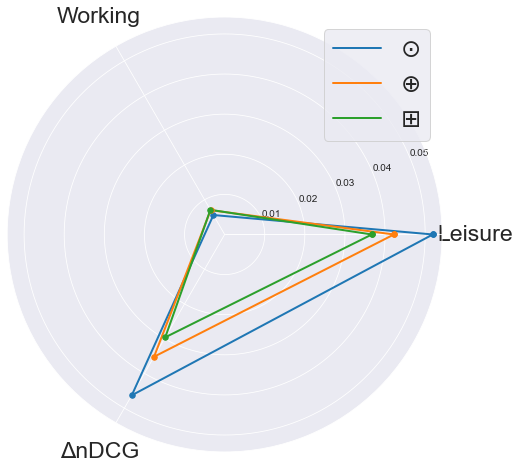

In [38]:
draw_radar_chart(dataset="Yelp", model="GeoSoCa")